In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso,LassoCV
from sklearn import metrics

## Part1

In [2]:
df=pd.read_csv('insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

In [25]:
df1=df.copy()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
df.dtypes[df.dtypes=='object']

sex       object
smoker    object
region    object
dtype: object

In [11]:
df.dtypes[df.dtypes!='object']

age           int64
bmi         float64
children      int64
charges     float64
dtype: object

In [12]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [14]:
list(df.dtypes[df.dtypes=='object'])

[dtype('O'), dtype('O'), dtype('O')]

sex
male      676
female    662
Name: sex, dtype: int64


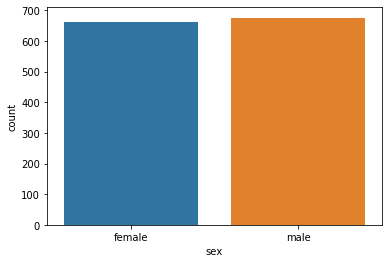

smoker
no     1064
yes     274
Name: smoker, dtype: int64


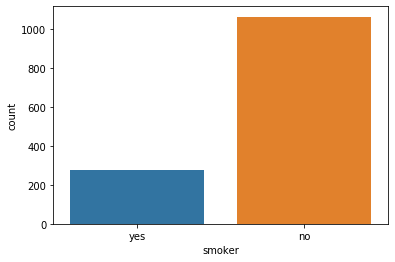

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


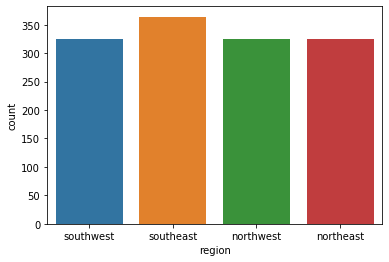

In [16]:
lst=['sex','smoker','region']
for col in lst:
    print(col)
    print(df[col].value_counts())
    sns.countplot(df[col])
    plt.show()
    

In [17]:
df.isnull().sum()[df.isnull().sum()!=0]

Series([], dtype: int64)

In [23]:
for col in df.columns:
    print(col)
    print(df[df[col]==0].shape[0])

age
0
sex
0
bmi
0
children
574
smoker
0
region
0
charges
0


From above analysis we can find out that there are no null values and also no 0 values(except children which can be zero) in the data. No we need to check for the outliers in the data. Before that we plot the distribution and boxplots and assign numerical values to the categorical variables.

Plotting Box plots for the categorical variable

sex


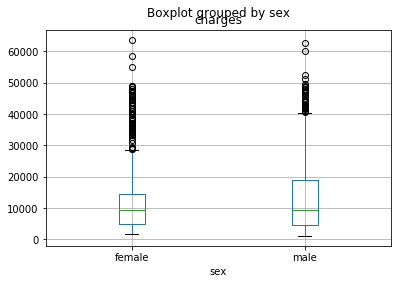

smoker


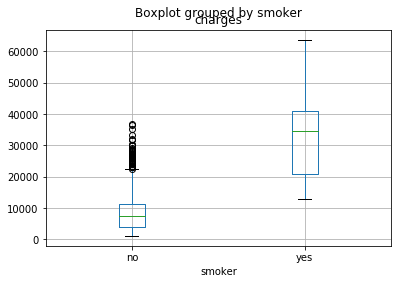

region


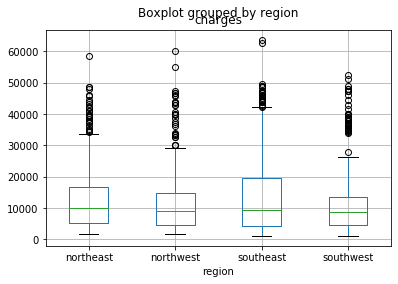

In [24]:
for col in lst:
    print(col)
    df.boxplot(column='charges',by=col)
    plt.show()

Looking at the boxplots and median positions, we replace the values in the categorical features with numbers 

In [26]:
df['sex'].replace({'female':0,'male':1},inplace=True)

In [27]:
df['smoker'].replace({'no':0,'yes':1},inplace=True)

In [28]:
df['region'].replace({'southwest':0,'northwest':1,'southeast':2,'northeast':3},inplace=True)

Now we can plot the disributions and check

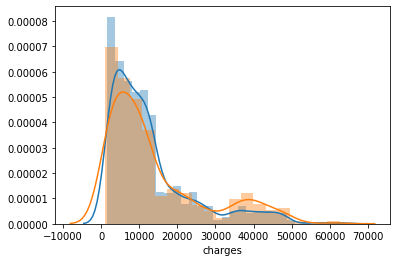

In [30]:
#sex:
sns.distplot(df[df['sex']==0]['charges'])
sns.distplot(df[df['sex']==1]['charges'])
plt.show()

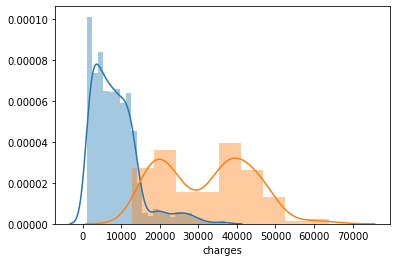

In [31]:
#smoker
sns.distplot(df[df['smoker']==0]['charges'])
sns.distplot(df[df['smoker']==1]['charges'])
plt.show()

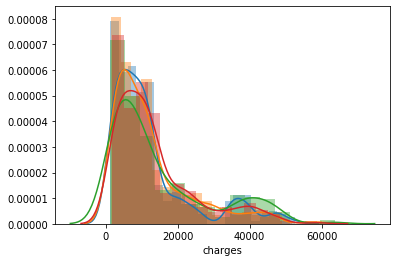

In [34]:
#region
sns.distplot(df[df['region']==0]['charges'])
sns.distplot(df[df['region']==1]['charges'])
sns.distplot(df[df['region']==2]['charges'])
sns.distplot(df[df['region']==3]['charges'])

plt.show()

age


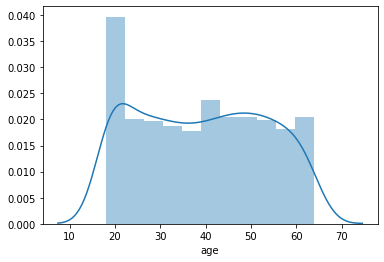

bmi


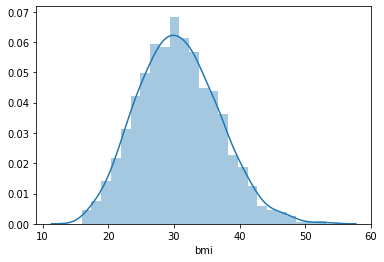

children


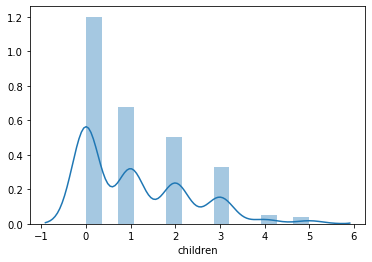

charges


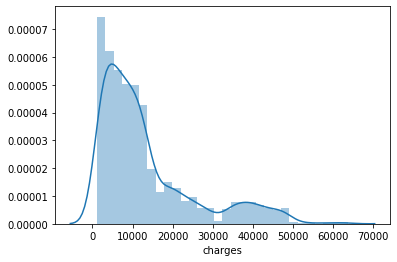

In [36]:
lst1=['age','bmi','children','charges']
for col in lst1:
    print(col)
    sns.distplot(df[col])
    plt.show()


In [37]:
df.skew()

age         0.055673
sex        -0.020951
bmi         0.284047
children    0.938380
smoker      1.464766
region     -0.035750
charges     1.515880
dtype: float64

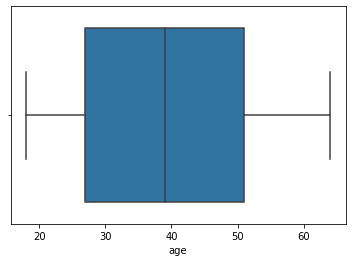

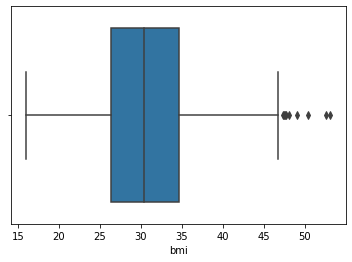

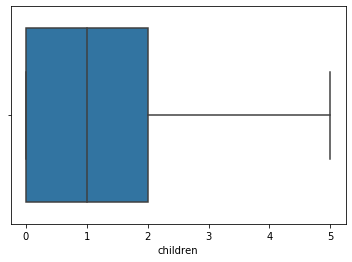

In [39]:
for col in lst1[0:-1]:
    sns.boxplot(df[col])
    plt.show()

We can see outliers in BMI only. As also mentioned in the description the BMI of the person should be in between 18.5 to 24.9. So we check the outliers as per and decide what action is to be taken

In [47]:
df.loc[df['bmi']>24.9]

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.90,0,1,0,16884.9240
1,18,1,33.77,1,0,2,1725.5523
2,28,1,33.00,3,0,2,4449.4620
4,32,1,28.88,0,0,1,3866.8552
5,31,0,25.74,0,0,2,3756.6216
...,...,...,...,...,...,...,...
1333,50,1,30.97,3,0,1,10600.5483
1334,18,0,31.92,0,0,3,2205.9808
1335,18,0,36.85,0,0,2,1629.8335
1336,21,0,25.80,0,0,0,2007.9450


There are 1096 observations  greater than 24.9 and hence we cannot just drop all of those.

To deal with the outliers we will use z score approach


In [48]:
d=st.zscore(df)
df=df[(abs(d)<3).all(axis=1)]

In [49]:
df.shape

(1309, 7)

Thus, we have eliminated around 3% of the outliers from the data.

## PART 2

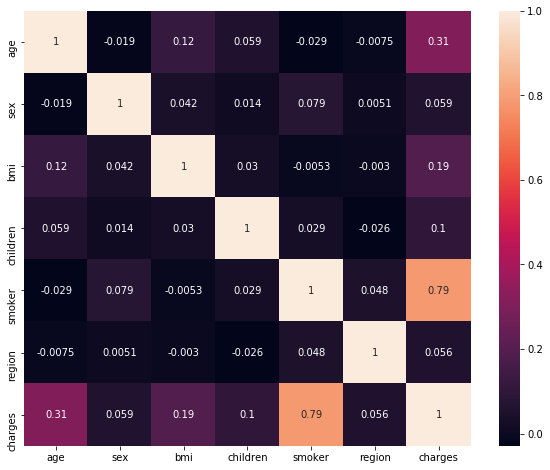

In [53]:
plt.figure(figsize=[10,8])
ax=sns.heatmap(df.corr(),annot=True)
bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)
plt.show()

Following are the observations from the Heatmap
1. The smoker and the charges  are highly correlated
2. The age and the charges are highly correlated followed by BMI and no. of children


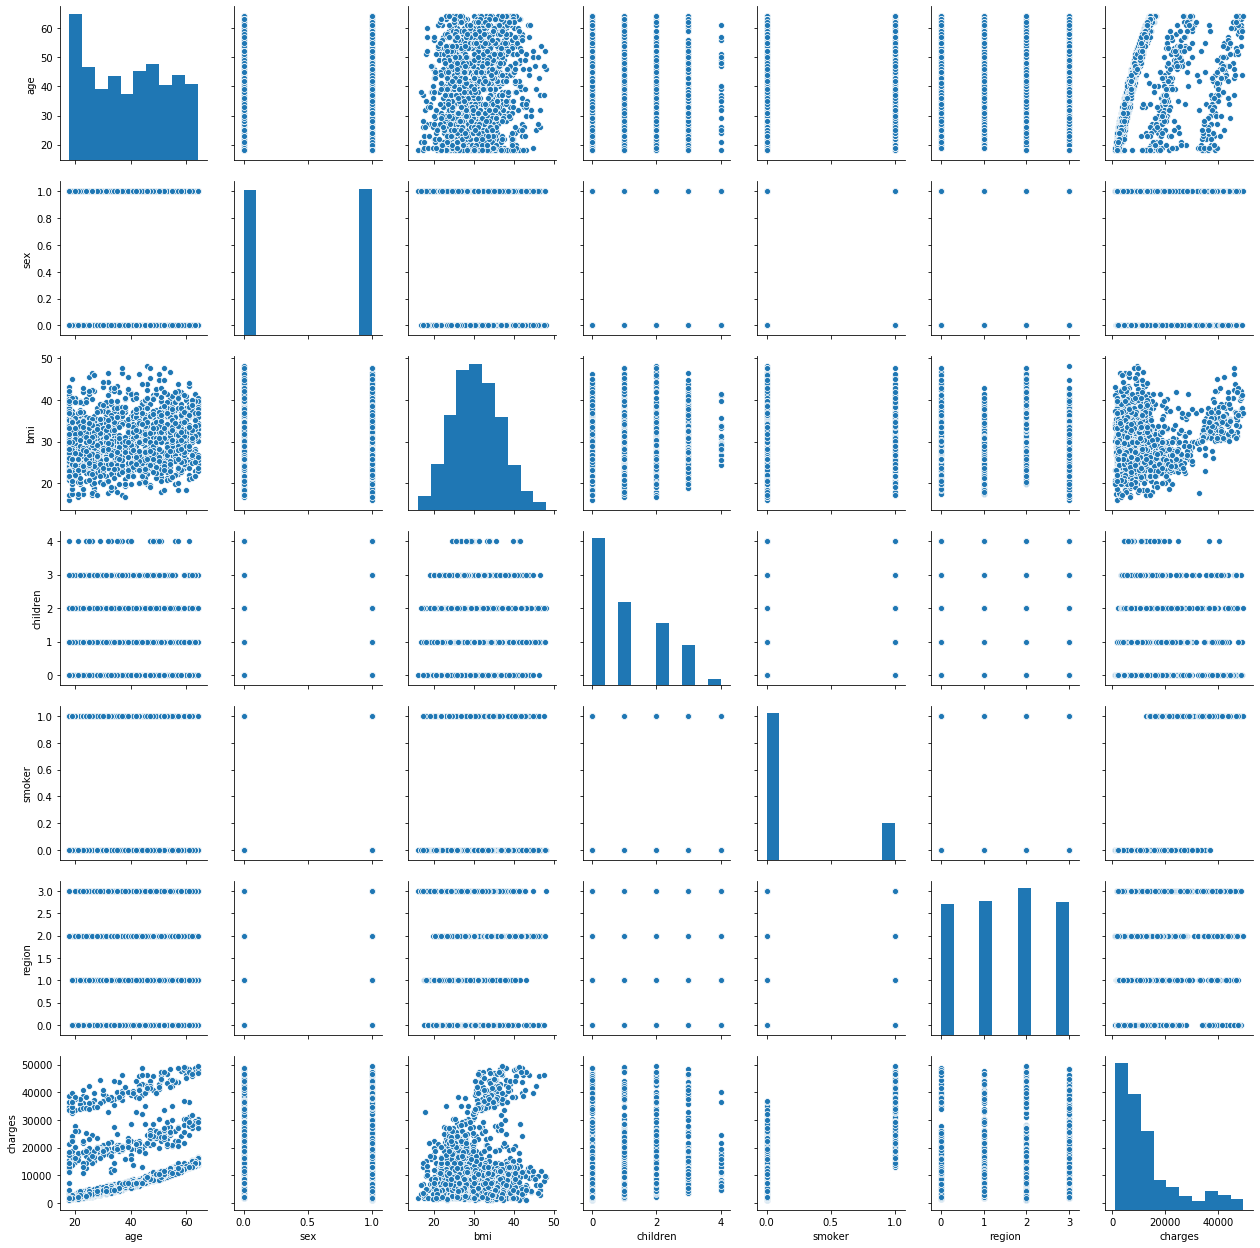

In [55]:
sns.pairplot(df)
plt.show()

By looking at the heatmap we cannot directly remove any variable but have to check the significance of the variables and only then can we decide whether to keep or remove the variable

Significance Testing of variables:

#H0:mu(sample)=mu(population)
#H1:mu(sample)!=mu(population)
#alpha=0.05

In [56]:
lst1

['age', 'bmi', 'children', 'charges']

In [62]:
for col in lst1[0:-1]:
    pvalue=st.ttest_ind(df[col],df['charges'])[1]
    if pvalue<0.05:
        print(col)

age
bmi
children


All the three continuous variables are significant as their pvalues are smaller than 0.05

Now we check the significance of categorical variables

In [63]:
#sex
st.ttest_ind(df[df['sex']==0]['charges'],df[df['sex']==1]['charges'])[1]
    

0.031480485321147444

In [64]:
#smoker
st.ttest_ind(df[df['smoker']==0]['charges'],df[df['smoker']==1]['charges'])[1]

3.109489224087728e-274

In [65]:
#region
st.f_oneway(df[df['region']==0]['charges'],df[df['region']==1]['charges'],df[df['region']==2]['charges'],df[df['region']==3]['charges'])[1]

0.024392409326049868

From above analysis we see that only smoker variable is significant. this can also be observed from the displots plotted above as we see that the means of the categories in sex and region are almost coinciding

Thus, the significant variables are age,bmi,children and smoker

Now we check the VIF also

In [73]:
X=df.drop('charges',axis=1)
y=df['charges']
Xc=sm.add_constant(X)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [74]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=[variance_inflation_factor(Xc.values,i) for i in range(Xc.shape[1])]
pd.DataFrame({'VIF':vif[1:]},index=X.columns)

,VIF
age,1.018844
sex,1.008802
bmi,1.016784
children,1.005842
smoker,1.010347
region,1.003074


The VIF values are almost equal to 1 and hence we can say that the variables are not multicollineared.

We also check the significant columns using RFE

In [75]:
X.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region'], dtype='object')

In [76]:
from sklearn.feature_selection import RFE

In [77]:
model = LinearRegression()
rfe = RFE(model, 6)
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True]
[1 1 1 1 1 1]


In [78]:
#no of features
nof_list=np.arange(1,6)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 5
Score with 5 features: 0.788417


In [79]:
cols = list(X.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 5)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['age', 'bmi', 'children', 'smoker', 'region'], dtype='object')


As per RFE we have 'age', 'bmi', 'children', 'smoker', 'region' and earlier analysis age', 'bmi', 'children', 'smoker'. We 

In [80]:
X=X.drop('sex',axis=1)

Fitting the OLS model

In [81]:
Xc=sm.add_constant(X)
model=sm.OLS(y,Xc).fit()
model.summary()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     792.6
Date:                Wed, 04 Mar 2020   Prob (F-statistic):               0.00
Time:                        14:07:16   Log-Likelihood:                -13209.
No. Observations:                1309   AIC:                         2.643e+04
Df Residuals:                    1303   BIC:                         2.646e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.206e+04    953.281    -12.649      0.000   -1.39e+04   -1.02e+04
age          255.4683     11.589     22.045      0.000     232.734     278.202
bmi          310.0380     27.269     11.370      0.000     256.542     363.534
children     577.1873    144.239      4.002      0.000     294.221     860.154
smoker      2.313e+04    403.239     57.372      0.000    2.23e+04    2.39e+04
region       229.8301    146.620      1.568      0.117     -57.807     517.467
==============================================================================
Omnibus:                      258.890   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              520.082
Skew:                           1.148   Prob(JB):                    1.16e-113
Kurtosis:                       5.065   Cond. No.                         303.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From OLS model we find that the region feature is insignificant and hence we drop it

In [83]:
X=X.drop('region',axis=1)

In [84]:
Xc=sm.add_constant(X)
model=sm.OLS(y,Xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     989.0
Date:                Wed, 04 Mar 2020   Prob (F-statistic):               0.00
Time:                        14:08:18   Log-Likelihood:                -13210.
No. Observations:                1309   AIC:                         2.643e+04
Df Residuals:                    1304   BIC:                         2.646e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -1.17e+04    926.712    -12.630      0.000   -1.35e+04   -9886.468
age          255.3894     11.595     22.026      0.000     232.643     278.136
bmi          309.9782     27.284     11.361      0.000     256.453     363.504
children     571.1704    144.269      3.959      0.000     288.147     854.194
smoker      2.317e+04    402.985     57.484      0.000    2.24e+04     2.4e+04
==============================================================================
Omnibus:                      260.256   Durbin-Watson:                   2.091
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              522.399
Skew:                           1.154   Prob(JB):                    3.65e-114
Kurtosis:                       5.061   Cond. No.                         294.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Part 3

Splitting the model

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#H0:mu(original_dataset)=mu(split_dataset)
#H1:mu(original_dataset)!=mu(split_dataset)
#alpha=0.05

In [89]:
st.ttest_ind(X,X_train)[1]

array([0.97549386, 0.33663548, 0.86934776, 0.97790214])

In [90]:
st.ttest_ind(X,X_test)[1]

array([0.95755881, 0.09315729, 0.77503039, 0.96147575])

In [91]:
st.ttest_ind(y,y_train)[1]

0.8470478776800386

In [92]:
st.ttest_ind(y,y_test)[1]

0.7407990824309791

Thus in all the cases the pvalue>0.05. Hence we fail to reject the null hypothesis and have enough evidence to say that the splits are the representation of the original dataset

In [93]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_trains=ss.fit_transform(X_train)
X_tests=ss.transform(X_test)

Fitting a base Model

In [109]:

from sklearn.metrics import r2_score,mean_squared_error

In [99]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [100]:
lr=LinearRegression()
knn=KNeighborsRegressor()
rf=RandomForestRegressor()
svr=SVR()

In [110]:
def model_eval(algo,Xtrain,ytrain,Xtest,ytest):
    algo.fit(Xtrain,ytrain)
    y_train_pred=algo.predict(Xtrain)
   
    
    y_test_pred=algo.predict(Xtest)
    

    print('Root Mean Square Error - Train: ','\n',np.sqrt(mean_squared_error(ytrain,y_train_pred)))
    print('R2 Score - Train: ',r2_score(ytrain,y_train_pred))
    #print('MAPE - Train: ',mean_absolute_percentage_error(y_true, y_pred)
    print('\n')

    print('Root Mean Square Error - Test: ','\n',np.sqrt(mean_squared_error(ytest,y_test_pred)))
    print('R2 score - Test: ',r2_score(ytest,y_test_pred))
    #print('MAPE - Test: ',mean_absolute_percentage_error(y_true, y_pred))
    print('\n')

In [ ]:
#LR

In [111]:
model_eval(lr,X_train,y_train,X_test,y_test)

Root Mean Square Error - Train:  
 5936.958480123394
R2 Score - Train:  0.7341386399743512


Root Mean Square Error - Test:  
 5632.637188558882
R2 score - Test:  0.7877759432712684




In [ ]:
#KNN

In [103]:
model_eval(knn,X_trains,y_train,X_tests,y_test)

Root Mean Square Error - Train:  
 4185.410476862514
R2 Score - Train:  0.8678694286830153


Root Mean Square Error - Test:  
 4726.052324421109
R2 score - Test:  0.850593976577816




In [ ]:
#RF

In [104]:
model_eval(rf,X_train,y_train,X_test,y_test)

Root Mean Square Error - Train:  
 1868.4199510343087
R2 Score - Train:  0.9736684641727498


Root Mean Square Error - Test:  
 4766.33900999428
R2 score - Test:  0.848035931291494




In [ ]:
#SVR

In [107]:
model_eval(svr,X_trains,y_train,X_tests,y_test)

Root Mean Square Error - Train:  
 12028.802137860095
R2 Score - Train:  -0.09136987315883127


Root Mean Square Error - Test:  
 12802.444990998934
R2 score - Test:  -0.09636936642431726




1. From above analysis we find that the best model is KNN which has least RMSE and highest accuracy over the test data.(85%)
2. In case of Linear Regression we see that the accuracy of test is much higher than that of the Train but since we have to go with the best we choose KNN
3. Also in case of RF, we see that the accuracy of the test is around 84% but the model is highly overfitting. 
4. Incase of the SVR, the Rscores are negative and hence we do not consider that model

We fine tune the KNN model and check if the accuracy increases and RMSE further reduces

In [112]:
from sklearn.model_selection import RandomizedSearchCV
knn=KNeighborsRegressor()



In [123]:
params={'n_neighbors':np.arange(3,15),
        'weights':['uniform','distance'],
        'p':np.arange(1,2)
       }

rsearch=RandomizedSearchCV(knn,param_distributions=params,n_iter=100,scoring='neg_mean_squared_error',n_jobs=-1,random_state=3)
rsearch.fit(X,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 24 is smaller than n_iter=100. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                                 metric='minkowski',
                                                 metric_params=None,
                                                 n_jobs=None, n_neighbors=9,
                                                 p=1, weights='distance'),
                   iid='deprecated', n_iter=100, n_jobs=-1,
                   param_distributions={'n_neighbors': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'p': array([1]),
                                        'weights': ['uniform', 'distance']},
                   pre_dispatch='2*n_jobs', random_state=3, refit=True,
                   return_train_score=False, scoring='neg_mean_squared_error',
                   verbose=0)

In [124]:
rsearch.best_params_

{'weights': 'distance', 'p': 1, 'n_neighbors': 9}

In [125]:
knn=KNeighborsRegressor(**rsearch.best_params_)

In [126]:
model_eval(knn,X_trains,y_train,X_tests,y_test)

Root Mean Square Error - Train:  
 447.50386555636464
R2 Score - Train:  0.9984894998216622


Root Mean Square Error - Test:  
 4649.216415594923
R2 score - Test:  0.8554125559110102




We find that after hyperparameter tuning there is no much difference. Thus,now we check for the RF algo

In [131]:
from scipy.stats import randint as sp_randint
rf=RandomForestRegressor()

params={
    'n_estimators':sp_randint(50,250),
    'max_depth':sp_randint(2,10),
    'min_samples_split':sp_randint(2,20),
    'min_samples_leaf':sp_randint(1,30),
    'max_features':sp_randint(2,4),
    }

rsearch=RandomizedSearchCV(rf,param_distributions=params,n_iter=100,scoring='neg_mean_squared_error',n_jobs=-1,random_state=3)
rsearch.fit(X,y)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                           

In [132]:
rsearch.best_params_

{'max_depth': 4,
 'max_features': 3,
 'min_samples_leaf': 7,
 'min_samples_split': 14,
 'n_estimators': 73}

In [134]:
rf=RandomForestRegressor(**rsearch.best_params_)
model_eval(rf,X_train,y_train,X_test,y_test)

Root Mean Square Error - Train:  
 4286.8221431471875
R2 Score - Train:  0.8613888619237191


Root Mean Square Error - Test:  
 4119.113992455066
R2 score - Test:  0.8865044909383815




After tuning the RandonmForestRegressor, we see that the accuracy increases to 88% and also the RMSE for the test decreses to 4119. Initially there was also overfitting which has now reduced.
Thus, we can go with this model

In [143]:
from sklearn.model_selection import GridSearchCV
rf=RandomForestRegressor()



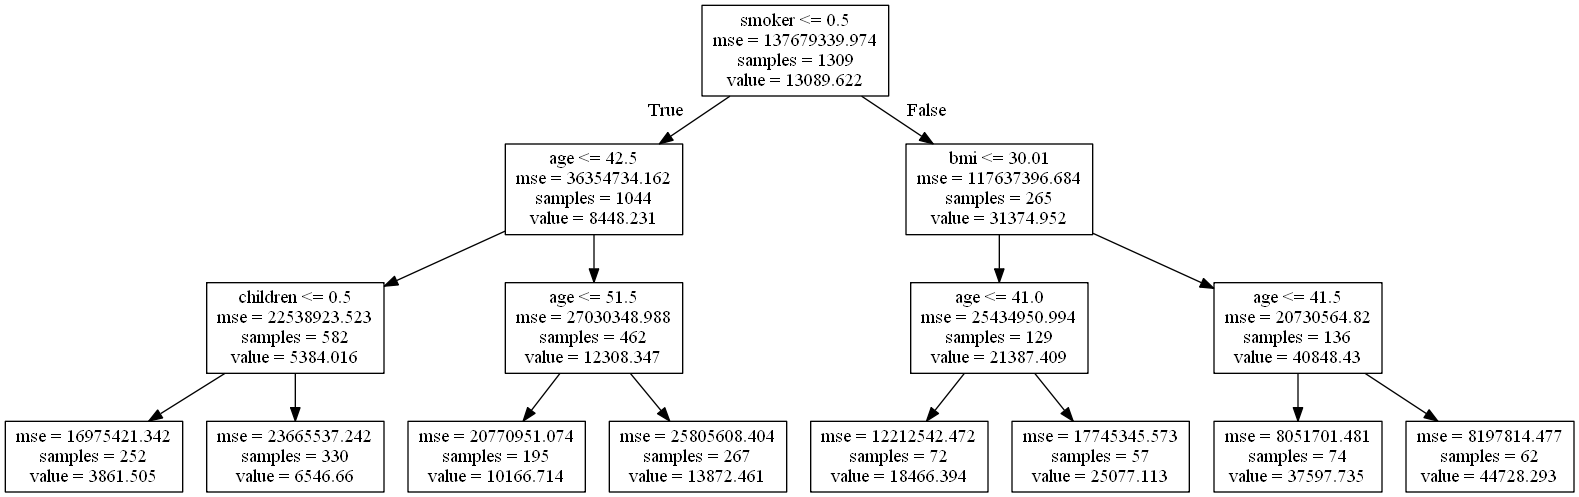

In [148]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydotplus

import os
os.environ['PATH']=os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

DecisionTree = DecisionTreeRegressor(criterion='mse',max_depth=3, min_samples_leaf=5)

DecisionTree.fit(X, y)
features = X.columns
# Create DOT data
dot_data = export_graphviz(DecisionTree, out_file=None, feature_names=features) 
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data) 
# Show graph
Image(graph.create_png())

We see that smoker is the most deciding factor to decide the insurance charges.For smokers with true value have age as next deciding criteria while others have bmi as the decising criteria.
Thus we can understand the significance of each factor by using the Decision Tree

The base model was fine tuned to improve the accuracy and also the overfitting was reduced